In [1]:
from phi.flow import * 
import pylab

In [2]:
DT = 1.5 
NU = 0.01

GRID_SIZE=(32,40)

INFLOW = CenteredGrid(Sphere(center=(30,15), radius=10), extrapolation.BOUNDARY, x=GRID_SIZE[0], y=GRID_SIZE[1], bounds=Box[0:60, 0:100])*0.2

In [3]:
smoke = CenteredGrid(0, extrapolation.BOUNDARY, x=GRID_SIZE[0], y=GRID_SIZE[1],  bounds=Box[0:60, 0:100]) # sampled at cell centers
velocity = StaggeredGrid(0, extrapolation.ZERO, x=GRID_SIZE[0], y=GRID_SIZE[1],  bounds=Box[0:60, 0:100]) # sampled in staggered form at face centers

In [145]:
def step(velocity, smoke, pressure, dt=1.0, buoyancy_factor=1.0): 
    smoke = advect.semi_lagrangian(smoke, velocity, dt) + INFLOW 
    buoyancy_force = smoke * (0, buoyancy_factor) @ velocity 
    # resamples smoke to velocity sample points 
    velocity = advect.semi_lagrangian(velocity, velocity, dt) + dt * buoyancy_force
    velocity = diffuse.explicit(velocity, NU, dt) 
    velocity, pressure = fluid.make_incompressible(velocity) 
    return velocity, smoke, pressure

Computed frame 0, max velocity 0.474671334028244
Computed frame 1, max velocity 0.9125422239303589
Computed frame 2, max velocity 1.420495867729187
Computed frame 3, max velocity 2.1193790435791016
Computed frame 4, max velocity 3.0021753311157227
Computed frame 5, max velocity 3.9487998485565186
Computed frame 6, max velocity 4.549746513366699
Computed frame 7, max velocity 4.81300687789917
Computed frame 8, max velocity 5.0420241355896
Computed frame 9, max velocity 5.277277946472168


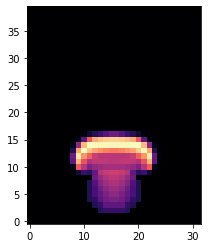

In [146]:
velocity, smoke, pressure = step(velocity, smoke, None, dt=DT)
for time_step in range(10): 
    velocity, smoke, pressure = step(velocity, smoke, pressure, dt=DT)
    print('Computed frame {}, max velocity {}'.format(time_step , np.asarray(math.max(velocity.values)) ))
pylab.imshow(smoke.values.numpy('y,x'), origin='lower', cmap='magma')

Computing time step 0
Computing time step 1
Computing time step 2
Computing time step 10
Computing time step 20


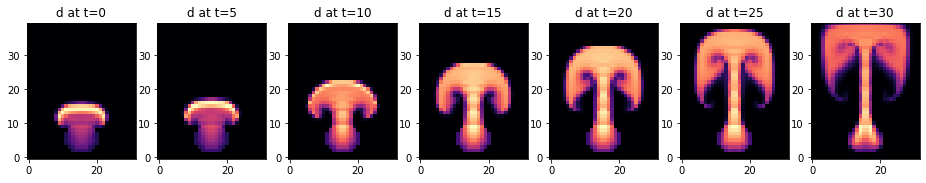

In [147]:
steps = [[ smoke.values, velocity.values.vector[0], velocity.values.vector[1] ]] 
for time_step in range(30): 
    if time_step<3 or time_step%10==0:
        print('Computing time step %d' % time_step)
    velocity, smoke, pressure = step(velocity, smoke, pressure, dt=DT) 
    if time_step%5==0: 
        steps.append( [smoke.values, velocity.values.vector[0], velocity.values.vector[1]] )

fig, axes = pylab.subplots(1, len(steps), figsize=(16, 5)) 
for i in range(len(steps)): 
    axes[i].imshow(steps[i][0].numpy('y,x'), origin='lower', cmap='magma') 
    axes[i].set_title(f"d at t={i*5}")